In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns

In [4]:
df=pd.read_csv('titanic_cleaned.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,isalone,Title,AgeGroup,Age_scaled,Fare_scales,Familysize_scaled
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,147,2,2,0,Mr,YoungAdult,-0.565736,-0.502445,0.059160
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,81,0,2,0,Mrs,Adult,0.663861,0.786845,0.059160
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,147,2,1,1,Miss,YoungAdult,-0.258337,-0.488854,-0.560975
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,55,2,2,0,Mrs,YoungAdult,0.433312,0.420730,0.059160
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,147,2,1,1,Mr,YoungAdult,0.433312,-0.486337,-0.560975


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    int64  
 5   Age                891 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    int64  
 9   Fare               891 non-null    float64
 10  Cabin              891 non-null    int64  
 11  Embarked           891 non-null    int64  
 12  Familysize         891 non-null    int64  
 13  isalone            891 non-null    int64  
 14  Title              891 non-null    object 
 15  AgeGroup           891 non-null    object 
 16  Age_scaled         891 non

In [11]:
X=df.drop(['Survived','Name','Title','AgeGroup'],axis=1)
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
dt_gini=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=42)
dt_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [13]:
dt_entro=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)
dt_entro.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [18]:
pred_gini=dt_gini.predict(X_test)
pred_entropy=dt_entro.predict(X_test)

print('Gini accuracy ',accuracy_score(y_test,pred_gini))
print('Entropy accuracy' ,accuracy_score(y_test,pred_entropy))

Gini accuracy  0.7988826815642458
Entropy accuracy 0.8100558659217877


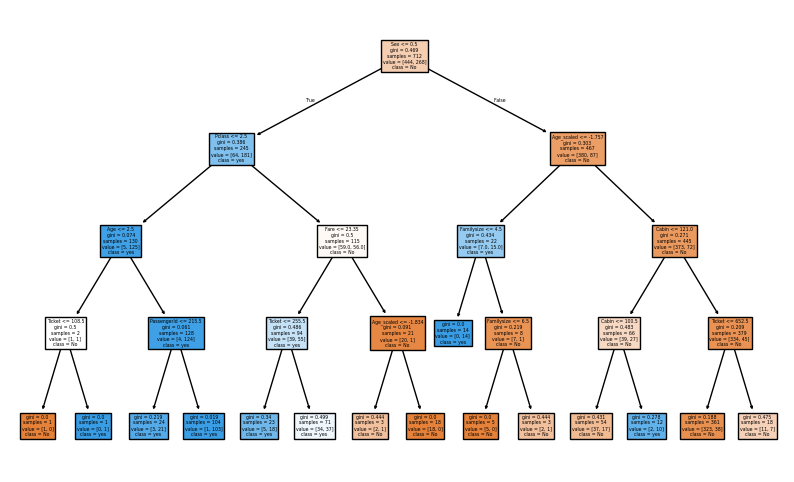

In [19]:
plt.figure(figsize=(10,6))
plot_tree(dt_gini,filled=True,feature_names=X.columns,class_names=["No","yes"])
plt.show()

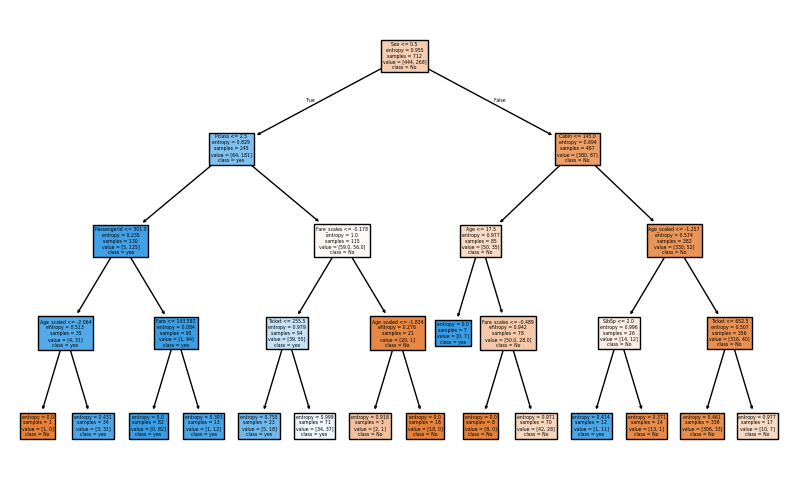

In [20]:
plt.figure(figsize=(10,6))
plot_tree(dt_entro,filled=True,feature_names=X.columns,class_names=["No","yes"])
plt.show()

In [24]:
rf=RandomForestClassifier(n_estimators=200,
                          max_depth=6,
                          min_samples_split=4,
                          min_samples_leaf=2,
                          max_features='sqrt',
                          bootstrap=True,
                          random_state=42)

rf.fit(X_train,y_train)
pred_rf=rf.predict(X_test)

print("Random Forest Accuracy", accuracy_score(y_test,pred_rf))

Random Forest Accuracy 0.8156424581005587


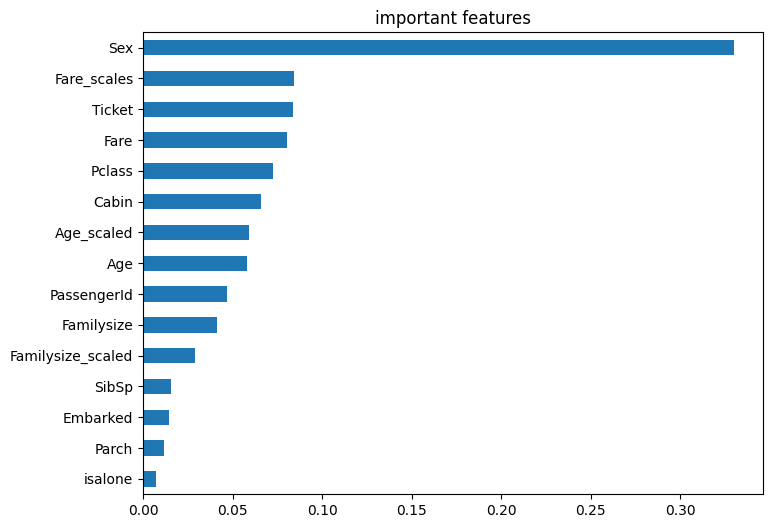

In [25]:
importance=pd.Series(rf.feature_importances_,index=X.columns)
importance.sort_values().plot(kind='barh',figsize=(8,6))
plt.title("important features")
plt.show()

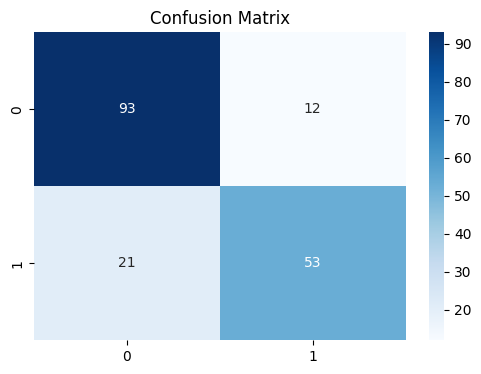

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [26]:
cm = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, pred_rf))
